#  IMPORT LIBRARIES/DATASETS

In [1]:
!pip install tensorflow
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

  Stored in directory: C:\Users\RJSHA\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built termcolor
  Found existing installation: h5py 2.9.0
    Uninstalling h5py-2.9.0:
      Successfully uninstalled h5py-2.9.0
  Found existing installation: scipy 1.2.1
    Uninstalling scipy-1.2.1:
      Successfully uninstalled scipy-1.2.1


In [4]:
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [5]:

X_train,y_train=train['features'],train['labels']
X_validation,y_validation=valid['features'],valid['labels']
X_test,y_test=test['features'],test['labels']

In [6]:
X_train.shape

(34799, 32, 32, 3)

In [7]:
y_train.shape

(34799,)

#  PERFORM IMAGES VISUALIZATION

3

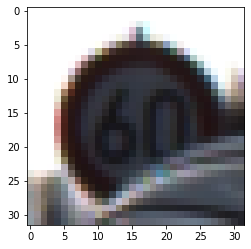

In [8]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

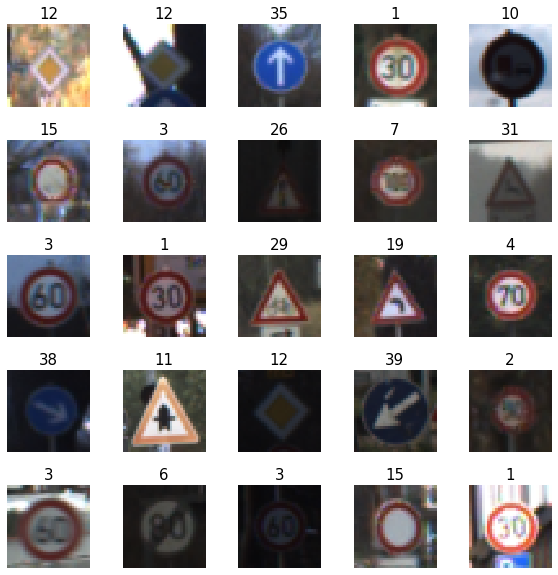

In [10]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 

for i in np.arange(0,W_grid*L_grid):
    index=np.random.randint(0,n_training)
    # Select a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index],fontsize=15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

        

#  CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [11]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [12]:
X_train_gray=np.sum(X_train/3,axis=3,keepdims=True)
X_validation_gray=np.sum(X_validation/3,axis=3,keepdims=True)
X_test_gray=np.sum(X_test/3,axis=3,keepdims=True)

In [13]:
X_train_gray.shape

(34799, 32, 32, 1)

In [14]:
X_train_gray_norm=(X_train_gray-128)/128
X_validation_gray_norm=(X_validation_gray-128)/128
X_test_gray_norm=(X_test_gray-128)/128

In [15]:
X_train_gray_norm

array([[[[-0.83072917],
         [-0.85677083],
         [-0.82291667],
         ...,
         [-0.5546875 ],
         [-0.546875  ],
         [-0.56510417]],

        [[-0.80208333],
         [-0.84114583],
         [-0.82552083],
         ...,
         [-0.53385417],
         [-0.51822917],
         [-0.578125  ]],

        [[-0.78385417],
         [-0.83333333],
         [-0.84895833],
         ...,
         [-0.5234375 ],
         [-0.54427083],
         [-0.59375   ]],

        ...,

        [[-0.84895833],
         [-0.87760417],
         [-0.8828125 ],
         ...,
         [-0.6640625 ],
         [-0.58072917],
         [-0.5703125 ]],

        [[-0.84375   ],
         [-0.85677083],
         [-0.85416667],
         ...,
         [-0.69010417],
         [-0.61197917],
         [-0.6015625 ]],

        [[-0.82291667],
         [-0.84114583],
         [-0.8671875 ],
         ...,
         [-0.69791667],
         [-0.62760417],
         [-0.60677083]]],


       [[[-0.92708333],


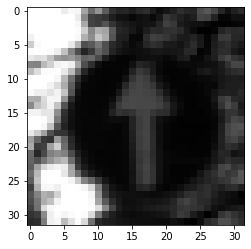

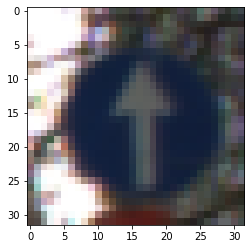

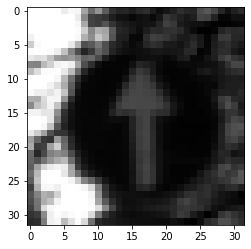

In [16]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

#  UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS 

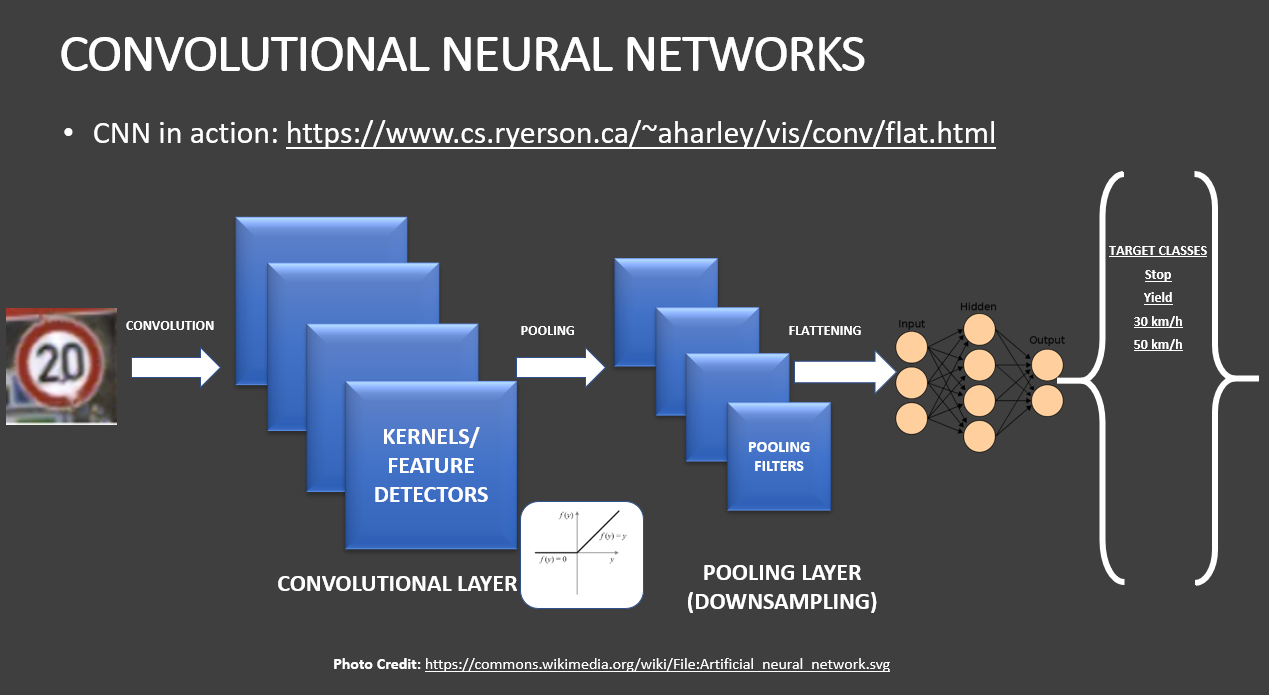

#  BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [25]:

from tensorflow.keras import datasets, layers, models
CNN=models.Sequential()

CNN.add(layers.Conv2D(6,(5,5),activation='relu',input_shape=(32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(6,(5,5),activation='relu',))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120,activation='relu'))
CNN.add(layers.Dense(84,activation='relu'))
CNN.add(layers.Dense(43,activation='softmax'))
CNN.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_6 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 6)         906       
_________________________________________________________________
average_pooling2d_7 (Average (None, 5, 5, 6)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)              

#  COMPILE AND TRAIN DEEP CNN MODEL

In [26]:
CNN.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
history=CNN.fit(X_train_gray_norm,
                y_train,
               batch_size=500,
               epochs=50,
               verbose=1,
               validation_data=(X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 12s 179ms/step - loss: 3.2952 - accuracy: 0.1394 - val_loss: 3.0186 - val_accuracy: 0.2497
Epoch 2/50
70/70 [==============================] - 12s 169ms/step - loss: 2.1151 - accuracy: 0.4201 - val_loss: 1.8006 - val_accuracy: 0.4905
Epoch 3/50
70/70 [==============================] - 11s 163ms/step - loss: 1.3286 - accuracy: 0.6090 - val_loss: 1.2668 - val_accuracy: 0.6449
Epoch 4/50
70/70 [==============================] - 12s 175ms/step - loss: 1.0001 - accuracy: 0.7071 - val_loss: 1.0453 - val_accuracy: 0.6891
Epoch 5/50
70/70 [==============================] - 11s 161ms/step - loss: 0.8264 - accuracy: 0.7567 - val_loss: 0.9030 - val_accuracy: 0.7417
Epoch 6/50
70/70 [==============================] - 11s 161ms/step - loss: 0.7175 - accuracy: 0.7915 - val_loss: 0.7909 - val_accuracy: 0.7828
Epoch 7/50
70/70 [==============================] - 12s 170ms/step - loss: 0.6283 - accuracy: 0.8161 - val_loss: 0.7485 - val_accuracy: 0.7898

# ASSESS TRAINED CNN MODEL PERFORMANCE 

In [28]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 0.8131 - accuracy: 0.8775
Test Accuracy: 0.8775138854980469


In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'training & Validation loss')

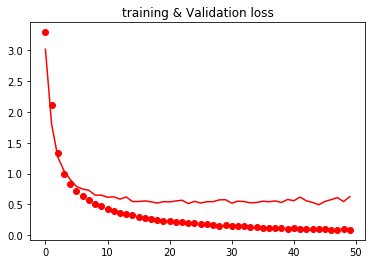

In [31]:
epochs=range(len(accuracy))
plt.plot(epochs,loss,'ro',label='Training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.title('training & Validation loss')


Text(0.5, 1.0, 'training & Validation accuracy')

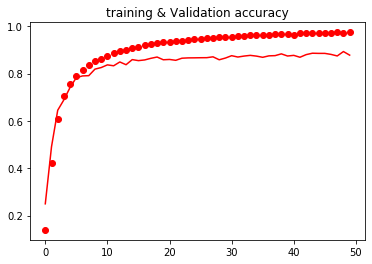

In [32]:
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'ro',label='Training accuracy')
plt.plot(epochs,val_accuracy,'r',label='validation accuracy')
plt.title('training & Validation accuracy')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


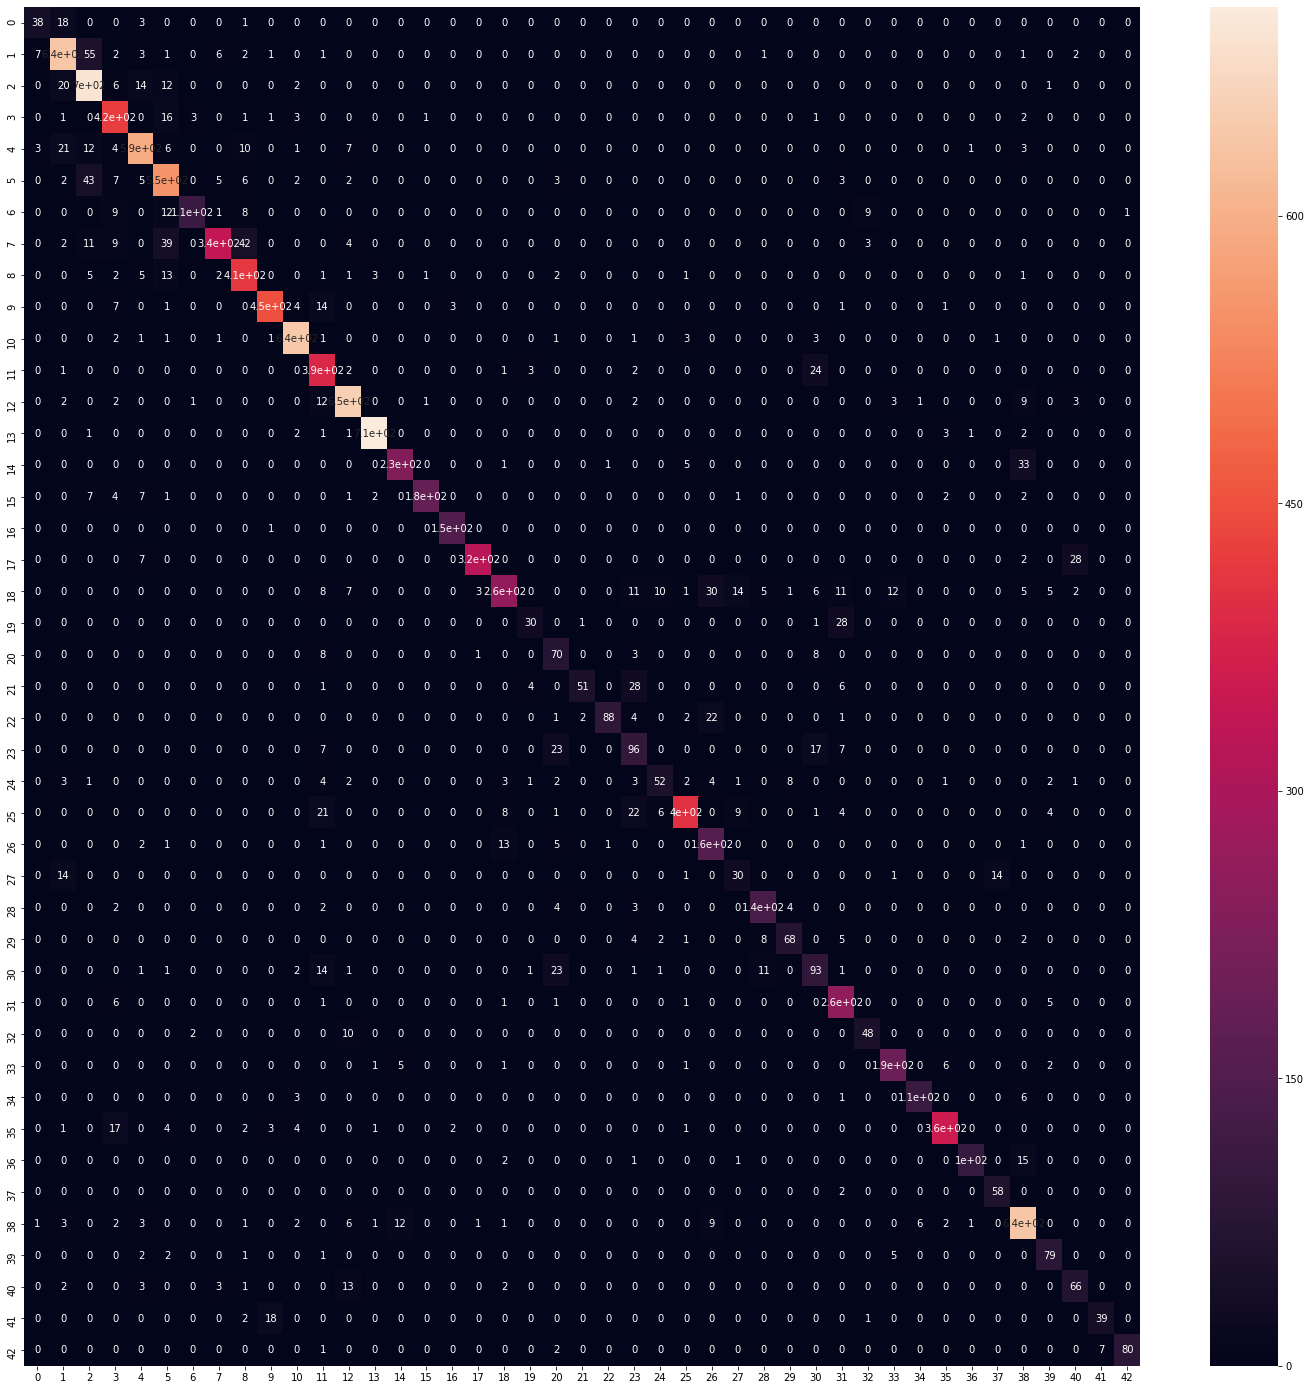

In [33]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

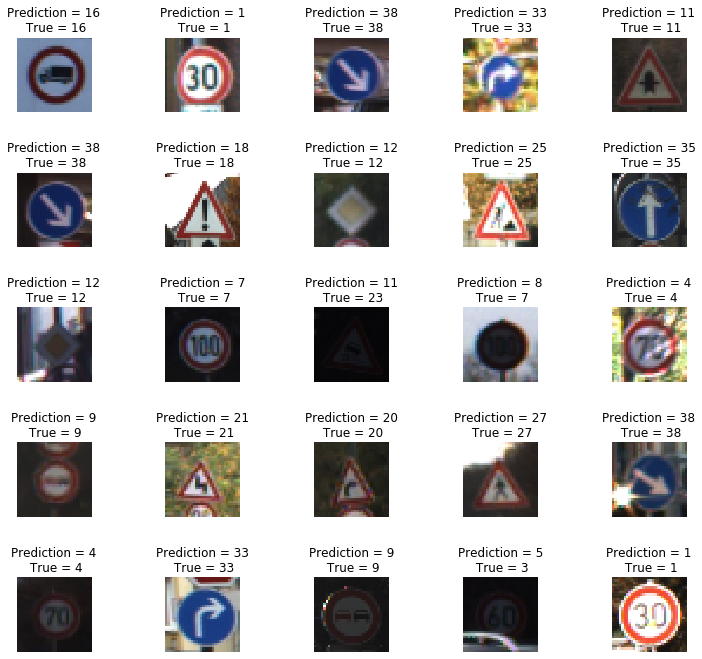

In [34]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }